In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
import statsmodels.api as sat
import seaborn as sns
sns.set()


from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('/Users/sazid/Downloads/advertising.csv')
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
corr, p_val = pearsonr(data['Sales'],data['TV'])
corr, p_val

(0.9012079133023307, 7.927911625321142e-74)

In [7]:
corr, p_val = pearsonr(data['Sales'],data['Radio'])
corr, p_val

(0.3496310970076691, 3.8828923644941305e-07)

In [8]:
corr, p_val = pearsonr(data['Sales'],data['Newspaper'])
corr, p_val

(0.15796002615492627, 0.025487444306996204)

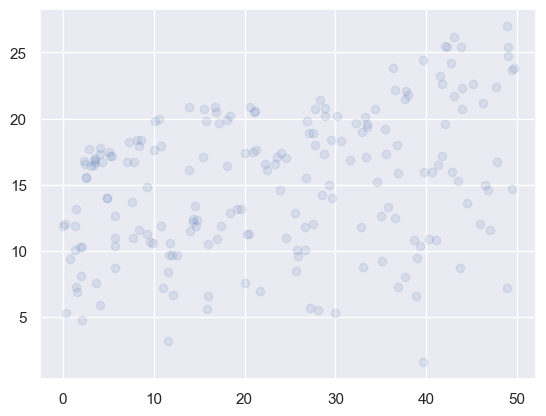

In [18]:
mat.scatter(data['Radio'],data['Sales'], alpha=.12)

Modeling ignoring Newspaper:

In [29]:
data1 = data.drop(['Newspaper'], axis=1)

data1

,TV,Radio,Sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,12.0
3,151.5,41.3,16.5
4,180.8,10.8,17.9
...,...,...,...
195,38.2,3.7,7.6
196,94.2,4.9,14.0
197,177.0,9.3,14.8
198,283.6,42.0,25.5


In [30]:
target = data1['Sales']

test = data1.drop(['Sales'], axis=1)

In [35]:
reg = LinearRegression()

reg.fit(test,target)

LinearRegression()

In [42]:
y_hat = pd.DataFrame()

In [43]:
y_hat['Predict']=reg.predict(test)

In [49]:
reg.score(test,target)

0.9025896186081139

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[['TV','Radio','Newspaper']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,2.486772,TV
1,3.285462,Radio
2,3.055245,Newspaper


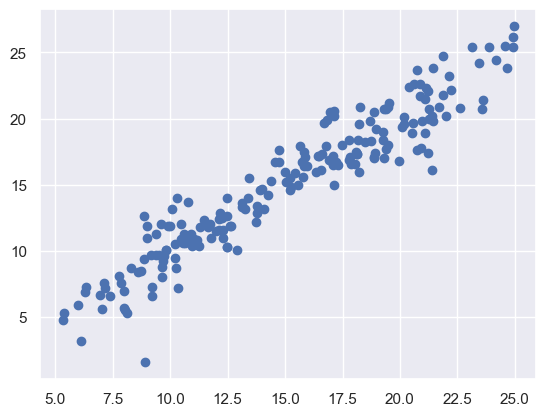

In [50]:
mat.scatter(y_hat, target)

In [65]:
x = pd.DataFrame()
x['target']=target
x['y_hat']=y_hat
x['risidual']= x['target']-x['y_hat']
x['%']=abs(x['risidual'])*100/x['target']

In [67]:
x.describe()

,target,y_hat,risidual,%
count,200.000000,200.000000,2.000000e+02,200.000000
mean,15.130500,15.130500,-1.194600e-15,11.286541
std,5.283892,5.019947,1.649136e+00,33.366337
min,1.600000,5.324207,-7.313107e+00,0.017998
25%,11.000000,10.631573,-8.269433e-01,3.218731
50%,16.000000,15.490853,9.509933e-03,5.819695
75%,19.050000,19.282622,9.022178e-01,11.721237
max,27.000000,24.948633,3.748432e+00,457.069173


Now modeling using Newspaper :

In [69]:
data2=data

In [70]:
target = data2['Sales']

test = data2.drop(['Sales'], axis=1)

In [72]:
target

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [73]:
reg.fit(test,target)

LinearRegression()

In [74]:
y_hat = pd.DataFrame()
y_hat['Predict']=reg.predict(test)
reg.score(test,target)


0.9025912899684558

In [75]:
x = pd.DataFrame()
x['target']=target
x['y_hat']=y_hat
x['risidual']= x['target']-x['y_hat']
x['%']=abs(x['risidual'])*100/x['target']

x.describe()

,target,y_hat,risidual,%
count,200.000000,200.000000,2.000000e+02,200.000000
mean,15.130500,15.130500,-1.563194e-15,11.280056
std,5.283892,5.019952,1.649122e+00,33.325060
min,1.600000,5.318396,-7.303405e+00,0.069294
25%,11.000000,10.631188,-8.244205e-01,3.169093
50%,16.000000,15.494340,-7.775337e-04,5.800156
75%,19.050000,19.284959,8.976299e-01,11.737849
max,27.000000,24.947551,3.747280e+00,456.462812
